In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #for visualizing the data
from datetime import datetime #converting the data into date type
from pmdarima import auto_arima #for finding the order of the model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf#to plot the acf and pacf graph
from statsmodels.tsa.stattools import adfuller #to perform ad fuller test of stationarity
import warnings
warnings.filterwarnings("ignore")


In [2]:
#function to change the date string into a datetime 
def parser(s):
    return datetime.strptime(s, '%m/%d/%Y')

In [3]:
#read data from excel file
df = pd.read_csv("Electric_Production.csv", parse_dates = [0], index_col = 0, date_parser = parser)

In [4]:
#deducing the frequency of the data
df = df.asfreq(pd.infer_freq(df.index))

In [5]:
#printing the first 5 elements from the dataset
df.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [6]:
#printing the last 5 elements from the dataset
df.tail()

,IPG2211A2N
DATE,
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359
2017-12-01,114.7212
2018-01-01,129.4048


In [7]:
#basic statistical values of the monthly production 
df.describe()

,IPG2211A2N
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


In [8]:
#cleaning up the data
df.columns = [ "Production"]
df.head()

,Production
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [9]:
#setting the date range
start_date = datetime(1985,1,1)
end_date = datetime(1985,5,1)
lim_df = df[start_date:end_date]


# Visualizing the data


Text(0, 0.5, 'Production Per Month')

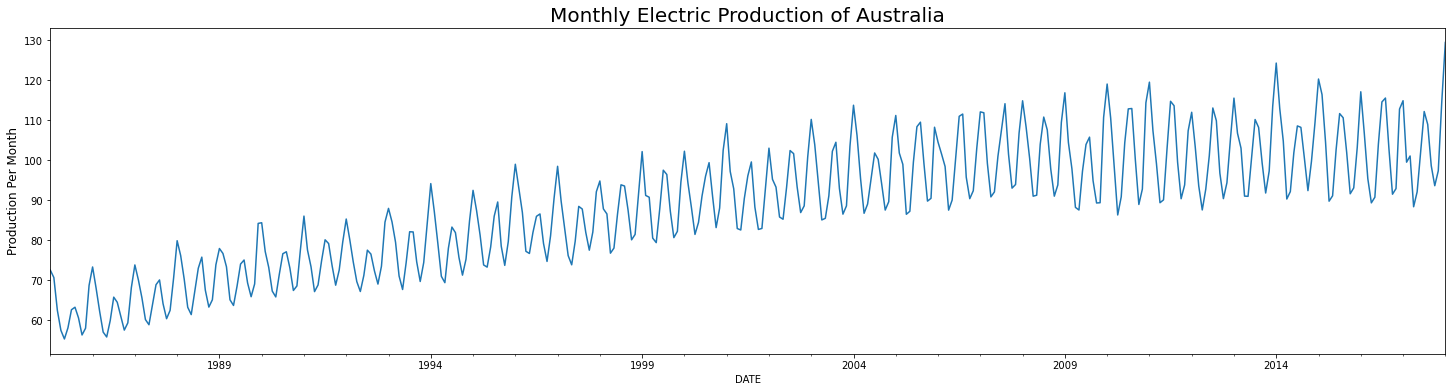

In [10]:
plt.figure(figsize = (25,6))
df['Production'].plot()
plt.title("Monthly Electric Production of Australia", fontsize = 20)
plt.ylabel('Production Per Month', fontsize = 12)

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

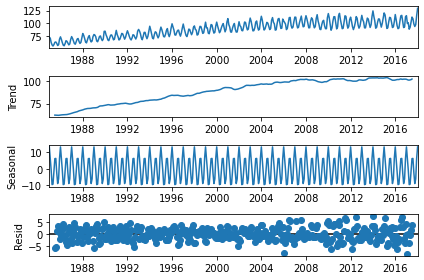

In [12]:
#graph of the components present in the dataset
decomposition = seasonal_decompose(df)
decomposition.plot()
plt.show()

# Testing for Stationarity 

While fitting any time series data, it is important to check if the time series data is stationary or not i.e. the time series data follows a constant mean, variance and co-variance throughout the period given in the dataset.
Hence, we'll now use augumented dicker fuller test to check the stationarity of the dataset. 

In [13]:
#using testing of hypothesis let us consider the null and alternative hypothesis as follows
#Ho : The data is non-stationary 
#H1 : The data is stationary

def adfuller_test(prod):
    result=adfuller(prod)
    print("1. ADF  Statistic : ", result[0])
    print("2. P-value : ", result[1])
    print("3. Number of lags : ", result[2])
    print("4. Number of regression used for ADF regression and Critical value calculation : ", result[3])
    print(" The critical value are as follows:")
    for key, val in result[4].items():
          print("\t", key , ":", val)
    if result[1] <= 0.05:
        print("We reject the null hypothesis as P-value < 0.05 and hence the time series is stationary.")
    else:
        print("We fail to reject the null hypothesis as as P-value >  0.05 and hence the time series is non-stationary ")
    

In [14]:
adfuller_test(df['Production'])

1. ADF  Statistic :  -2.25699035004725
2. P-value :  0.18621469116586592
3. Number of lags :  15
4. Number of regression used for ADF regression and Critical value calculation :  381
 The critical value are as follows:
	 1% : -3.4476305904172904
	 5% : -2.869155980820355
	 10% : -2.570827146203181
We fail to reject the null hypothesis as as P-value >  0.05 and hence the time series is non-stationary 


Since the p-value is less than 0.05, we fail to reject the null hypothesis and conclude that the time series data is non-stationary.
To convert a non-stationary data into a stationary one we use differencing i.e ,
Differencing(t) = observation(t) - observation(t-1)

# Differencing the data

In [15]:
#since the first differencing value is taken to be zero, we'll extract the values from the second row
first_diff = lim_df.diff()[1:]
print(first_diff)
first_diff.tail()

            Production
DATE                  
1985-02-01     -1.8332
1985-03-01     -8.2218
1985-04-01     -4.9788
1985-05-01     -2.1563


,Production
DATE,
1985-02-01,-1.8332
1985-03-01,-8.2218
1985-04-01,-4.9788
1985-05-01,-2.1563


Text(0, 0.5, 'Production')

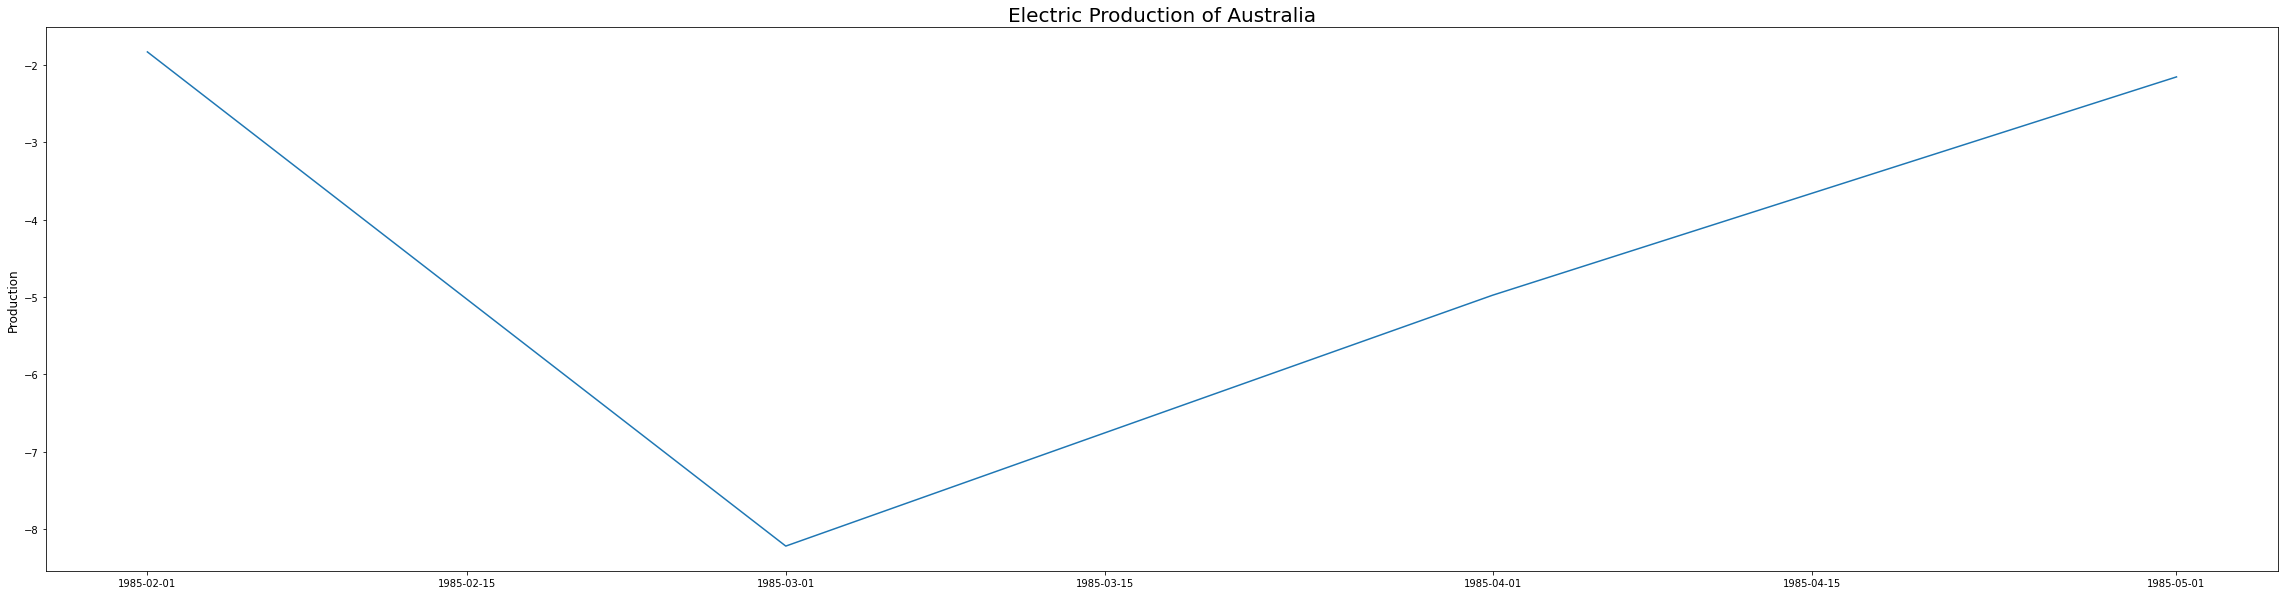

In [16]:
plt.figure(figsize = (40,10))
plt.plot(first_diff)
plt.title("Electric Production of Australia", fontsize = 20)
plt.ylabel("Production", fontsize = 12)

# Choosing the model to be fitted

# Method 1 : Finding the acf and pacf to know the order of the model

# ACF for the order of MA model

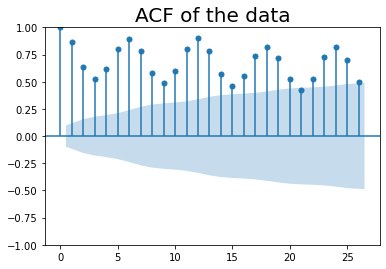

In [17]:
plot_acf(df['Production'])
plt.title("ACF of the data", fontsize = 20)
plt.show()

Looking at the ACF we can use MA(4) model

# PACF for the order of AR model

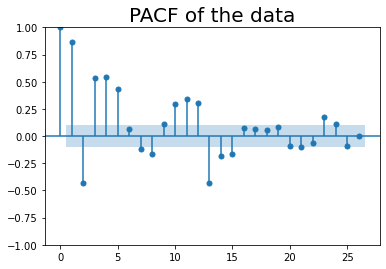

In [18]:
plot_pacf(df['Production'])
plt.title("PACF of the data", fontsize = 20)
plt.show()

Looking at the PACF we can say we can use AR(2)

# Method 2:  Finding the order using auto_arima library

In [19]:
stepwise_fit = auto_arima(df['Production'], trace = True, supress_warnings = True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2750.050, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2691.759, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2624.463, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2748.185, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2625.508, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2525.516, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2493.118, Time=0.19 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2449.570, Time=0.28 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2449.577, Time=0.23 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=2431.710, Time=0.42 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=2431.461, Time=0.28 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=2359.635, Time=0.43 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=2

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  397
Model:               SARIMAX(2, 1, 4)   Log Likelihood               -1021.370
Date:                Mon, 26 Dec 2022   AIC                           2058.740
Time:                        18:26:38   BIC                           2090.591
Sample:                    01-01-1985   HQIC                          2071.358
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1108      0.024      4.716      0.000       0.065       0.157
ar.L1          0.9986      0.002    507.293      0.000       0.995       1.002
ar.L2         -0.9993      0.001   -752.376      0.000      -1.002      -0.997
ma.L1         -1.3643      0.038    -35.664      0.000      -1.439      -1.289
ma.L2          0.9233      0.071     12.929      0.000       0.783       1.063
ma.L3          0.0063      0.071      0.089      0.929      -0.134       0.146
ma.L4         -0.4329      0.042    -10.246      0.000      -0.516      -0.350
sigma2         9.8896      0.635     15.575      0.000       8.645      11.134
===================================================================================
Ljung-Box (L1) (Q):                   1.04   Jarque-Bera (JB):                22.01
Prob(Q):                              0.31   Prob(JB):                         0.00
Heteroskedasticity (H):               1.95   Skew:                             0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Hence we'll go with ARIMA(2,1,4), modelling

# Getting the traning and testing data

In [20]:
print(df.shape)
train_data = df.iloc[:-80]
test_data = df.iloc[-80:]
print(train_data.shape, test_data.shape)

(397, 1)
(317, 1) (80, 1)


# Train the model

In [21]:
import statsmodels.api as sm

In [22]:
model = sm.tsa.arima.ARIMA(train_data, order=(2,1,4))
model = model.fit()

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Production   No. Observations:                  317
Model:                 ARIMA(2, 1, 4)   Log Likelihood                -803.143
Date:                Mon, 26 Dec 2022   AIC                           1620.286
Time:                        18:26:38   BIC                           1646.576
Sample:                    01-01-1985   HQIC                          1630.789
                         - 05-01-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9989      0.003    311.122      0.000       0.993       1.005
ar.L2         -0.9993      0.002   -642.792      0.000      -1.002      -0.996
ma.L1         -1.2842      0.049    -26.261      0.000      -1.380      -1.188
ma.L2          0.9114      0.089     10.208      0.000       0.736       1.086
ma.L3          0.0274      0.092      0.298      0.766      -0.153       0.208
ma.L4         -0.4126      0.061     -6.792      0.000      -0.532      -0.294
sigma2         9.0789      0.674     13.474      0.000       7.758      10.400
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                22.85
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.81   Skew:                             0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# making prediction on test set

In [24]:
start = len(train_data)
end = len(train_data) + len(test_data)- 1
prediction = model.predict(start = start, end = end)
print(prediction)


2011-06-01    104.076232
2011-07-01    115.503091
2011-08-01    113.157139
2011-09-01     99.822551
2011-10-01     88.847178
                 ...    
2017-09-01     99.457769
2017-10-01     89.053927
2017-11-01     91.779856
2017-12-01    104.898822
2018-01-01    115.279122
Freq: MS, Name: predicted_mean, Length: 80, dtype: float64


<AxesSubplot:xlabel='DATE'>

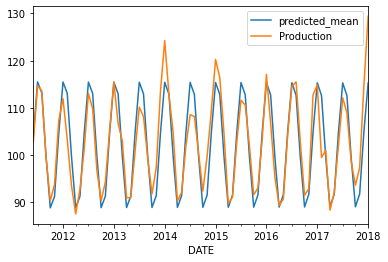

In [25]:
prediction.plot(legend = True)
test_data["Production"].plot(legend = True)

In [26]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(prediction,test_data['Production']))
print(rmse)

4.399757676797558


In [27]:
model2 = sm.tsa.arima.ARIMA(df["Production"], order=(2,0,2))
model2 = model2.fit()
df.tail()

,Production
DATE,
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359
2017-12-01,114.7212
2018-01-01,129.4048


# Predicting future production for the next 6 months

In [28]:
future_dates = pd.date_range(start = "2018-01-01", end = "2018-08-01")
start = len(df)
end = len(df)+6
prediction =model2.predict(start=start,end=end,start_params=None,dynamic=True).rename("predicted Values")
prediction_index = future_dates
print(prediction)

2018-02-01    122.222355
2018-03-01    110.966533
2018-04-01    107.011846
2018-05-01    105.615565
2018-06-01    105.115785
2018-07-01    104.930158
2018-08-01    104.854622
Freq: MS, Name: predicted Values, dtype: float64


<AxesSubplot:>

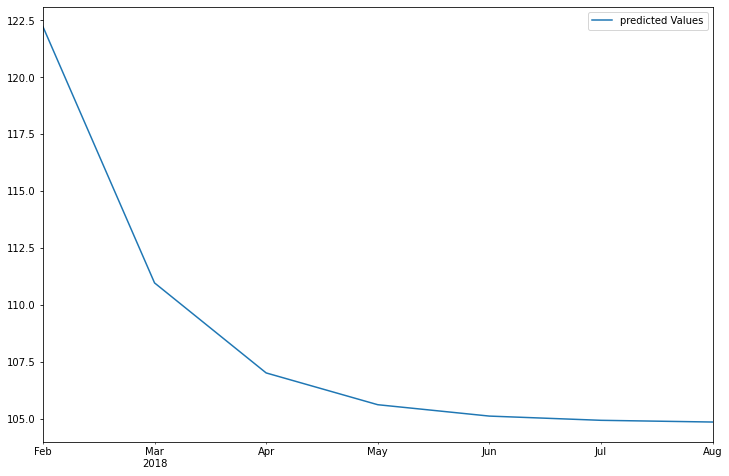

In [29]:
prediction.plot(figsize = (12,8), legend = True)